In [60]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


In [16]:
qb_df = pd.read_csv('QUARTERBACKS.csv')

In [18]:
X = qb_df
y = X.pop('Total Points')

numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,Average Points,Standard Deviation,Floor (-1 Standard Dev),Ceiling (+1 Standard Dev),Games > 10 Pts,Games > 20 Pts,Games > 30 Pts,Total Attempts,Avgerage Attempts,Total Completions,Average Completions,Average Pass Yds,Average Pass Tds,Average Interceptions,Average Rush Yds,Average Rush Tds,Red Zone Pass Opps,Red Zone Rush Opps,Avg Red Zone Opps,Games Played
0,23.16,8.79,14.37,31.95,15,9,3,602,37.63,358,22.38,248.56,2.19,0.69,36.00,0.19,72,9,5.06,15
1,21.13,8.37,12.76,29.50,15,8,2,517,32.31,299,18.69,205.25,1.31,1.13,54.44,0.44,43,10,3.31,15
2,20.78,8.50,12.28,29.27,14,6,3,632,39.50,399,24.94,284.44,2.00,0.69,3.25,0.06,77,0,4.81,15
3,21.05,8.96,12.08,30.01,14,6,2,529,35.27,348,23.20,269.47,1.80,0.47,24.00,0.07,61,8,4.60,15
4,19.15,5.86,13.29,25.00,14,7,0,611,38.19,381,23.81,276.25,1.88,0.75,6.63,0.06,63,3,4.13,15


In [43]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X[numeric_variables], y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [44]:
#oob_score produces R^2 value
model.oob_score_

0.9576395417037196

In [61]:
y_oob = model.oob_prediction_
y = np.asarray(y, dtype=None, order=None)
#lol this also does that
r2_score(y, y_oob)

0.9576395417037196

Variable Importance Measures

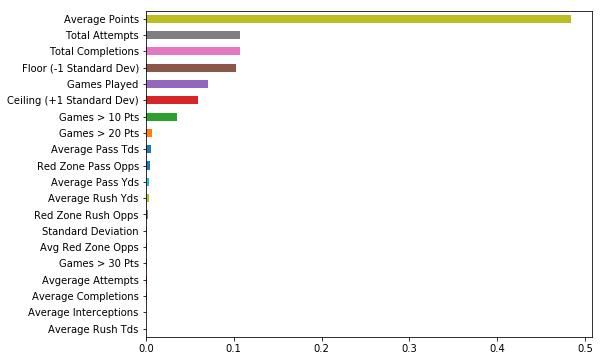

In [75]:
importances = model.feature_importances_

feature_importances = pd.Series(importances, index=X[numeric_variables].columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot(kind="barh", figsize=(8,6))


In [76]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)


The slowest run took 9.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.41 µs per loop


(30, 'trees')
('R Squared Score: ', 0.9572576953178509)
(50, 'trees')
('R Squared Score: ', 0.9575472029631346)
(100, 'trees')
('R Squared Score: ', 0.9576395417037196)
(200, 'trees')
('R Squared Score: ', 0.961218912015708)
(500, 'trees')
('R Squared Score: ', 0.9594576908526583)
(1000, 'trees')
('R Squared Score: ', 0.9585533688858516)
(2000, 'trees')
('R Squared Score: ', 0.958918124170278)


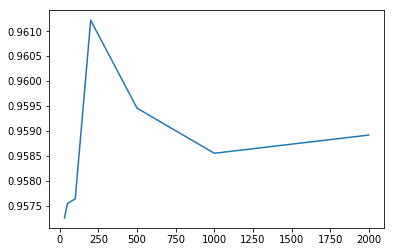

In [81]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X[numeric_variables],y)
    print(trees, "trees")
    r_square = r2_score(y, model.oob_prediction_)
    print("R Squared Score: ", r_square)
    results.append(r_square)
    
pd.Series(results, n_estimator_options).plot()

(1, ' min samples')
('r squared: ', 0.961218912015708)
(2, ' min samples')
('r squared: ', 0.9602694932147418)
(3, ' min samples')
('r squared: ', 0.9564337819975579)
(4, ' min samples')
('r squared: ', 0.9451864932220431)
(5, ' min samples')
('r squared: ', 0.9276802079174499)
(6, ' min samples')
('r squared: ', 0.8947705382785163)
(7, ' min samples')
('r squared: ', 0.8730601250644565)
(8, ' min samples')
('r squared: ', 0.8359707033324627)
(9, ' min samples')
('r squared: ', 0.8143316544779949)
(10, ' min samples')
('r squared: ', 0.8041550334647775)


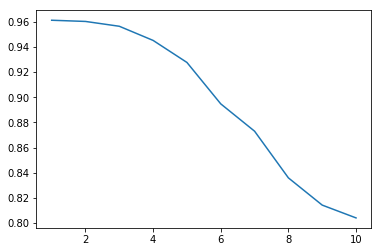

In [84]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators = 200, oob_score=True, n_jobs=1, random_state=42, max_features="auto", min_samples_leaf = min_samples)
    model.fit(X[numeric_variables], y)
    print(min_samples, " min samples")
    r_square = r2_score(y, model.oob_prediction_)
    print("r squared: ", r_square)
    results.append(r_square)
    
pd.Series(results, min_samples_leaf_options).plot()
    

Final Model


In [85]:
model = RandomForestRegressor(n_estimators=200, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=1)
model.fit(X[numeric_variables], y)
r_square = r2_score(y, model.oob_prediction_)
print("R Squared:", r_square)

('R Squared:', 0.961218912015708)
